<img src="imagens/viruss.png" style="width:1200px;height:350px;">

<div id="inicio"></div>

# Modelo Preditivo para pacientes entubados pela Covid 

## 2022.2 - INSPER
### Ciência dos Dados

Alunas:

- Alexia Barbosa Pires

- Ellen Coutinho Lião da Silva

- Jéssica Lendaw Silva de Araújo

## Sumário

- [Contextualização](#contextualizacao)
- [Tratamento da base de dados](#tratamento-dados)
- [Análise Exploratória](#analise-exploratoria)
- [Modelos Preditivos](#modelos-preditivos)
    1. [Árvore de Decisão](#arvore-decisao)
        - [Implementação](#implementacao-dt)

- [Conclusão](#conclusao)
- [Referências](#referencias)

<div id="contextualizacao"></div>

______
<h2> Contextualização </h2>

Durante a pandemia do vírus da COVID-19, a grande preocupação de muitas famílias com membros hospitalizados era referente à intubação. A razão pode ser justificada com dados. De acordo com a British Broadcasting Corporation, fonte internacional de notícias jornalísticas, ["80% dos intubados por covid-19 morreram no Brasil em 2020"](https://www.bbc.com/portuguese/brasil-56407803).

O nosso projeto se envolve à essa questão. Aqui, serão construído modelos preditivos para responder à seguinte questão: `A partir de um conjunto de informações sobre o paciente, ele será ou não entubado?`. Portanto, a intubação é a nossa variável target, que depende de outras variáveis (denominadas features - serão explicitadas a frente).

Para isso, será utilizado uma base de dados obtida na plataforma Kaggle ['COVID-19 Dataset'](https://www.kaggle.com/datasets/meirnizri/covid19-dataset), que contém dados fornecidos pelo governo mexicano com um grande número de informações anônimas relacionadas ao paciente, incluindo pré-condições.

______

Importando bibliotecas necessárias:

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização gráfica dos dados
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modelos preditivos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Módulos complementares para os modelos preditivos
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

C:\Users\Jessica\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Para encontrar a base de dados
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Jessica\Desktop\Nova pasta\projeto 2 - cdados\22-2b-cd-p2-ellen_alexia\Novo


In [3]:
# Lendo o dataframe
data = pd.read_csv('data covid\covid-data.csv')

<div id="tratamento-dados"></div>

______
<h2> Tratamento da Base de Dados </h2>


O conjunto de dados são de 1.048.576 pacientes, dos quais alguns são booleanos em que 1 significa "sim" e 2 significa "não", já valores como 97 e 99 são dados ausentes. Temos as seguintes variáveis explicativas (features):
- `Sexo`: feminino ou masculino.

- `Idade` do paciente.

- `Classificação`: resultados do teste covid. Valores 1-3 significam que o paciente foi diagnosticado com covid em diferentes graus, 4 ou superior significa que o paciente não é portador de covid ou que o teste é inconclusivo.

- `Tipo de paciente`: hospitalizado ou não hospitalizado.

- `Pneumonia`: se o paciente já tem ou não inflamação dos sacos aéreos.

- `gravidez`: se a paciente está grávida ou não.

- `diabetes:` se o paciente tem diabetes ou não.

- `copd`: Indica se o paciente tem doença pulmonar obstrutiva crônica ou não.

- `asma`: se o paciente tem asma ou não.

- `inmsupr`: se o paciente é imunossuprimido ou não.

- `hipertensão`: se o paciente tem hipertensão ou não.

- `cardiovascular`: se o paciente tem doença relacionada ao coração ou vasos sanguíneos.

- `renal crônica`: se o paciente tem doença renal crônica ou não.

- `outra doença`: se o paciente tem outra doença ou não.

- `obesidade`: se o paciente é obeso ou não.

- `tabaco`: se o paciente é usuário de tabaco.

- `usmr`: Indica se o paciente tratou unidades médicas de primeiro, segundo ou terceiro nível.

- `unidade médica`: tipo de instituição do Sistema Único de Saúde que prestou o atendimento.

- `entubado`: se o paciente estava conectado ao ventilador.

- `icu`: Indica se o paciente esteve internado em Unidade de Terapia Intensiva.

- `morte`: indica se o paciente morreu ou se recuperou.

In [4]:
# Visualizando o dataframe
data.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


Filtraremos o dataframe para manter somente às colunas que são relevantes para o nosso objetivo. Sendo assim, vamos remover as colunas de data de morte (DATE_DIED), gravidez (PREGNANT), tipo da instituição (MEDICAL_UNIT), nível de tratamento médico da unidade (USMER) e as linhas com pacientes que apresentaram teste negativo ou inconclusivo para covid.

In [5]:
dados = data

In [6]:
dados.pop('DATE_DIED')
dados.pop('PREGNANT')
dados.pop('MEDICAL_UNIT')
dados.pop('USMER')
dados = dados.loc[dados.CLASIFFICATION_FINAL < 4,:] 
dados.tail(4)

,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1047934,1,1,97,2,55,1,2,2,2,2,2,2,2,2,2,3,97
1047935,2,1,97,2,70,2,2,2,2,1,2,2,2,2,2,3,97
1047936,2,1,97,2,32,2,2,2,2,2,2,2,2,2,2,3,97
1047937,1,1,97,2,30,2,2,2,2,2,2,2,2,2,2,3,97


In [7]:
dados = dados.loc[(dados['SEX']) < 90]
dados = dados.loc[(dados['PATIENT_TYPE']) < 90]
dados = dados.loc[(dados['INTUBED']) < 90]
dados = dados.loc[(dados['PNEUMONIA']) < 90]
dados = dados.loc[(dados['DIABETES']) < 90]
dados = dados.loc[(dados['COPD']) < 90]
dados = dados.loc[(dados['ASTHMA']) < 90]
dados = dados.loc[(dados['INMSUPR']) < 90]
dados = dados.loc[(dados['HIPERTENSION']) < 90]
dados = dados.loc[(dados['OTHER_DISEASE']) < 90]
dados = dados.loc[(dados['CARDIOVASCULAR']) < 90]
dados = dados.loc[(dados['OBESITY']) < 90]
dados = dados.loc[(dados['RENAL_CHRONIC']) < 90]
dados = dados.loc[(dados['TOBACCO']) < 90]
dados = dados.loc[(dados['ICU']) < 90]

In [8]:
display(dados.describe())

,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,108273.000000,108273.0,108273.000000,108273.000000,108273.000000,108273.000000,108273.000000,108273.000000,108273.000000,108273.00000,108273.000000,108273.000000,108273.000000,108273.000000,108273.000000,108273.000000,108273.000000
mean,1.617236,2.0,1.784757,1.335347,55.813601,1.685739,1.965125,1.977677,1.976254,1.64705,1.956536,1.957847,1.768317,1.951281,1.921984,2.946672,1.905637
std,0.486064,0.0,0.410993,0.472114,16.092892,0.464223,0.183464,0.147733,0.152256,0.47789,0.203901,0.200938,0.421909,0.215282,0.268198,0.297893,0.292335
min,1.000000,2.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.0,2.000000,1.000000,46.000000,1.000000,2.000000,2.000000,2.000000,1.00000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,2.0,2.000000,1.000000,56.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
75%,2.000000,2.0,2.000000,2.000000,67.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
max,2.000000,2.0,2.000000,2.000000,105.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000


In [9]:
dados.isnull().sum()

SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [10]:
dados.shape

(108273, 17)

Vamos fazer algumas alterações para deixar a base de dados com maior facilidade de leitura.

In [11]:
dados.columns =['Sexo', 'Hospitalizado', 'Entubado', 'Pneumonia', 'Idade', 'Diabético', 'Obstrução pulmonar crônica', 'Asmático', 'Imunosuprimido', 'Hipertenso', 'Cardíaco', 'Renal', 'Outras doenças', 'Obeso', 'Fumante', 'Covid', 'UTI']

In [12]:
dados.head(2)

,Sexo,Hospitalizado,Entubado,Pneumonia,Idade,Diabético,Obstrução pulmonar crônica,Asmático,Imunosuprimido,Hipertenso,Cardíaco,Renal,Outras doenças,Obeso,Fumante,Covid,UTI
2,2,2,1,2,55,1,2,2,2,2,2,2,2,2,2,3,2
5,1,2,2,1,40,2,2,2,2,2,2,2,2,2,2,3,2


Como a base de dados já está filtrada com pacientes apenas com teste positivo para Covid, essa coluna não é mais necessária.

In [13]:
dados.pop('Covid')

2          3
5          3
8          3
9          3
11         3
          ..
1047913    3
1047919    3
1047928    3
1047929    3
1047933    3
Name: Covid, Length: 108273, dtype: int64

Continuando a legibilidade do dataframe, deve-se converter as variáveis categóricas.

In [14]:
# Converte colunas necessárias para categóricas
dados['Sexo'] = dados['Sexo'].astype('category')
dados['Hospitalizado'] = dados['Hospitalizado'].astype('category')
dados['Entubado'] = dados['Entubado'].astype('category')
dados['Pneumonia'] = dados['Pneumonia'].astype('category')
dados['Diabético'] = dados['Diabético'].astype('category')
dados['Obstrução pulmonar crônica'] = dados['Obstrução pulmonar crônica'].astype('category')
dados['Asmático'] = dados['Asmático'].astype('category')
dados['Imunosuprimido'] = dados['Imunosuprimido'].astype('category')
dados['Hipertenso'] = dados['Hipertenso'].astype('category')
dados['Cardíaco'] = dados['Cardíaco'].astype('category')
dados['Renal'] = dados['Renal'].astype('category')
dados['Outras doenças'] = dados['Outras doenças'].astype('category')
dados['Obeso'] = dados['Obeso'].astype('category')
dados['Fumante'] = dados['Fumante'].astype('category')
dados['UTI'] = dados['UTI'].astype('category')

In [15]:
dados['Hospitalizado'].describe()

count     108273
unique         1
top            2
freq      108273
Name: Hospitalizado, dtype: int64

Como nenhum paciente foi hospitalizado, essa coluna não terá utilidade no modelo.

In [16]:
dados.pop('Hospitalizado')

2          2
5          2
8          2
9          2
11         2
          ..
1047913    2
1047919    2
1047928    2
1047929    2
1047933    2
Name: Hospitalizado, Length: 108273, dtype: category
Categories (1, int64): [2]

In [17]:
# Cria cópia do dataframe. Esta cópia será mantida para conservar os valores numéricos 
dados_numerico = dados.copy()

In [18]:
dados.head(2)

,Sexo,Entubado,Pneumonia,Idade,Diabético,Obstrução pulmonar crônica,Asmático,Imunosuprimido,Hipertenso,Cardíaco,Renal,Outras doenças,Obeso,Fumante,UTI
2,2,1,2,55,1,2,2,2,2,2,2,2,2,2,2
5,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2


In [19]:
dados['Obstrução pulmonar crônica'].describe()

count     108273
unique         2
top            2
freq      104497
Name: Obstrução pulmonar crônica, dtype: int64

In [20]:
# Atribuindo as categorias para cada variável categórica
dados['Sexo'].cat.categories = ['Mulher', 'Homem']
dados['Entubado'].cat.categories = ['Sim','Não']
dados['Pneumonia'].cat.categories = ['Sim','Não']
dados['Diabético'].cat.categories = ['Sim','Não']
dados['Asmático'].cat.categories = ['Sim','Não']
dados['Obstrução pulmonar crônica'].cat.categories = ['Sim','Não']
dados['Imunosuprimido'].cat.categories = ['Sim','Não']
dados['Hipertenso'].cat.categories = ['Sim','Não']
dados['Cardíaco'].cat.categories = ['Sim','Não']
dados['Renal'].cat.categories = ['Sim','Não']
dados['Outras doenças'].cat.categories = ['Sim','Não']
dados['Obeso'].cat.categories = ['Sim','Não']
dados['Fumante'].cat.categories = ['Sim','Não']
dados['UTI'].cat.categories = ['Sim','Não']

In [21]:
dados.head(2)

,Sexo,Entubado,Pneumonia,Idade,Diabético,Obstrução pulmonar crônica,Asmático,Imunosuprimido,Hipertenso,Cardíaco,Renal,Outras doenças,Obeso,Fumante,UTI
2,Homem,Sim,Não,55,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
5,Mulher,Não,Sim,40,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


<div id="analise-exploratoria"></div>

___
<h2 class="analise_exploratoria"> Análise Exploratória </h2>

A análise exploratória é importante para se ter noção de como se comporta cada variável do dataframe. Com esse objetivo, deve-se construir gráficos para extrair informações sobre a depedência de cada uma das variáveis e sua importância sobre a variáveis target. 

Aqui veremos dois tipos de variáveis:

- `Variáveis quantitativas`: são aquelas cujo valor é um número (exemplos: idade, quantidade etc.)
- `Variáveis qualitativas`: apresentam uma classificação ou categoria. No dataframe em questão são representadas por números, mas, nesse caso, cada número representa uma dessas categorias (exemplos: sim/não, masculo/feminino etc.)

In [22]:
idade_descricao = pd.DataFrame(dados.Idade).describe()

In [23]:
idade_descricao.index = ['Quantidade total', 
                         'Média', 
                         'Desvio Padrão', 
                         'Valor mínimo', 
                         'Quartil (25%)', 
                         'Quartil (50%)', 
                         'Quartil (75%)', 
                         'Valor máximo']

In [24]:
display(idade_descricao)

,Idade
Quantidade total,108273.000000
Média,55.813601
Desvio Padrão,16.092892
Valor mínimo,0.000000
Quartil (25%),46.000000
Quartil (50%),56.000000
Quartil (75%),67.000000
Valor máximo,105.000000


A partir desses dados pode-se construir um histograma das idades da seguinte maneira:

(0.0, 105.0)

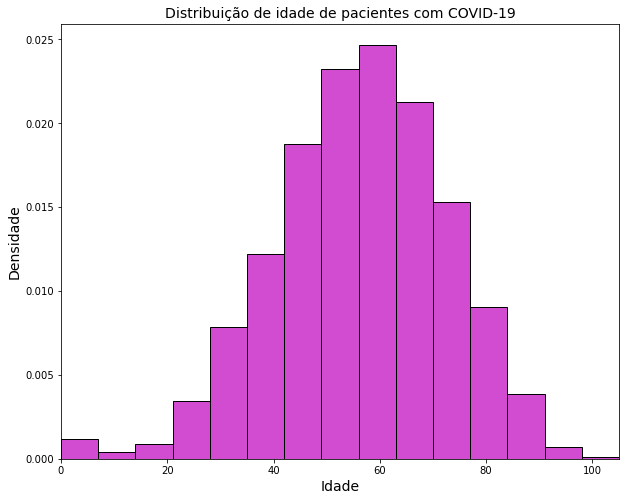

In [25]:
plt.figure(figsize=(10,8))
sns.histplot(dados['Idade'], stat='density', bins=15, color='m', alpha=0.7)
plt.ylabel('Densidade', fontsize=14)
plt.title('Distribuição de idade de pacientes com COVID-19', fontsize=14)
plt.xlabel('Idade', fontsize=14)
plt.xlim(0, 105)

## Plotagem das features em função da idade dos pacientes

Primeiro filtramos as colunas no dataframe para separar a varável que queremos analisar em função das outras

In [26]:
dados.columns

Index(['Sexo', 'Entubado', 'Pneumonia', 'Idade', 'Diabético',
       'Obstrução pulmonar crônica', 'Asmático', 'Imunosuprimido',
       'Hipertenso', 'Cardíaco', 'Renal', 'Outras doenças', 'Obeso', 'Fumante',
       'UTI'],
      dtype='object')

Em seguida, separamos as features que serão analisadas nos histogramas

In [27]:
my_features = ['Entubado', 'Pneumonia', 'Diabético',
       'Obstrução pulmonar crônica', 'Asmático', 'Imunosuprimido',
       'Hipertenso', 'Cardíaco', 'Renal', 'Outras doenças', 'Obeso', 'Fumante',
       'UTI']
       

In [28]:
#Ajuste de posição na plotagem do histograma
subs = []
for i in range(1, 5):
    for j in range(1, 5):
        subs.append([i, j, j + (i-1)*4])
subs

[[1, 1, 1],
 [1, 2, 2],
 [1, 3, 3],
 [1, 4, 4],
 [2, 1, 5],
 [2, 2, 6],
 [2, 3, 7],
 [2, 4, 8],
 [3, 1, 9],
 [3, 2, 10],
 [3, 3, 11],
 [3, 4, 12],
 [4, 1, 13],
 [4, 2, 14],
 [4, 3, 15],
 [4, 4, 16]]

In [29]:
#filtro de acordo com a quantidade de gráficos que queremos colocar lado a lado
subs= [[1, 1, 1],
 [1, 2, 2],
 [1, 3, 3],
 [1, 4, 4],
 [2, 1, 5],
 [2, 2, 6],
 [2, 3, 7],
 [2, 4, 8],
 [3, 1, 9],
 [3, 2, 10],
 [3, 3, 11],
 [3, 4, 12],
 [4, 1, 13]]

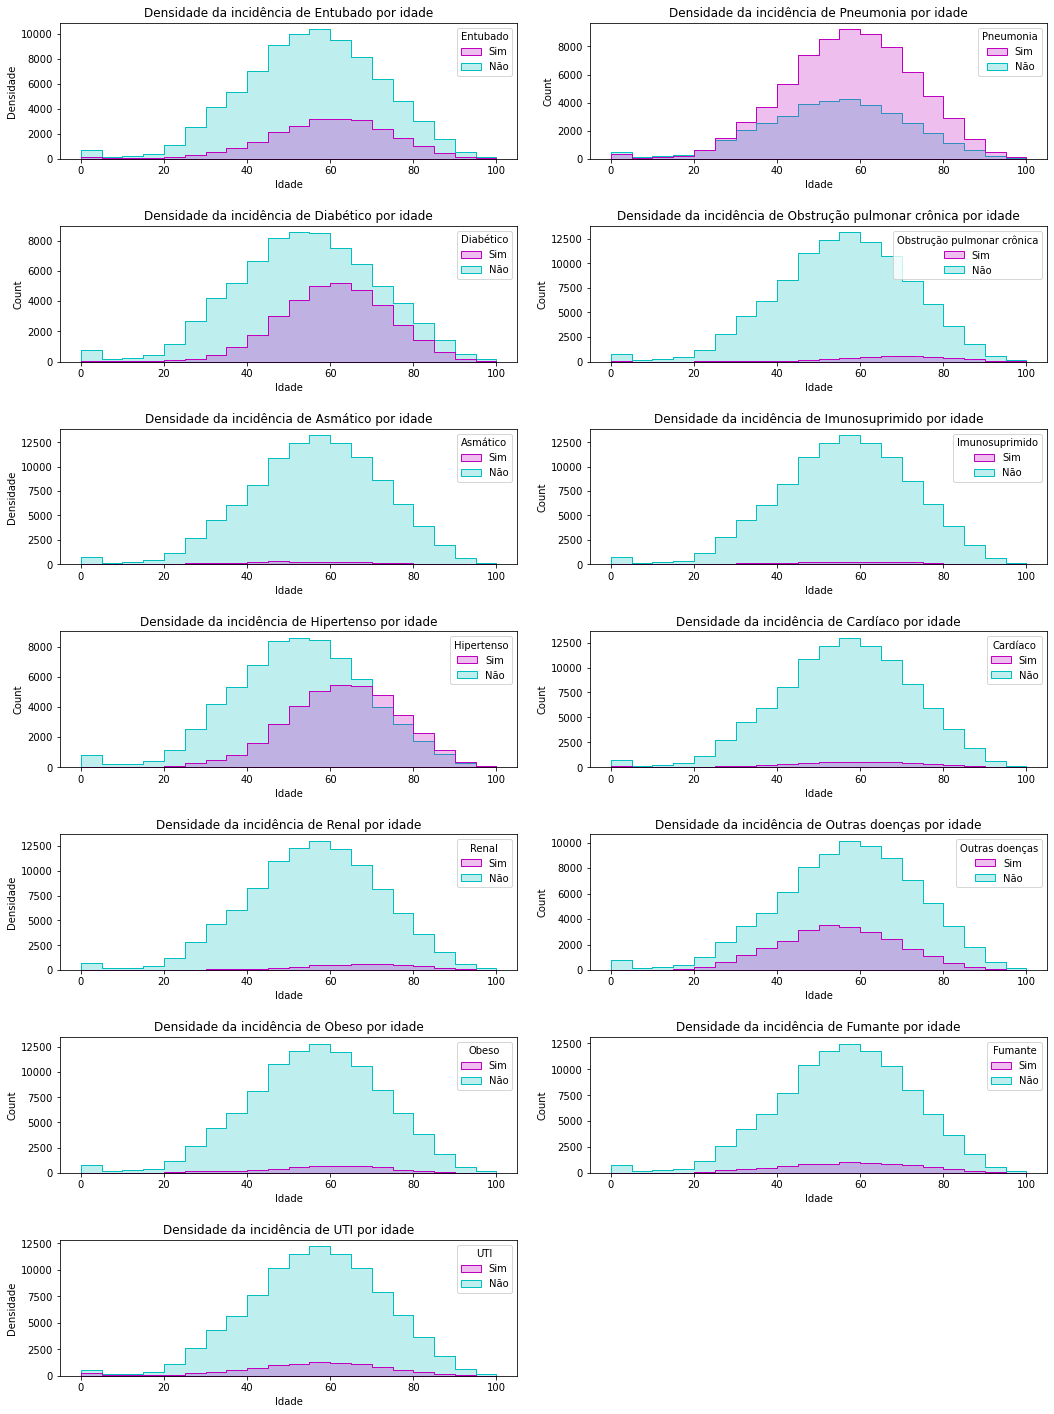

In [79]:
#Plotamos os histogramas com as features que gostaríamos de analisar
faixa_idade = np.arange(0, 105, 5)

plt.figure(figsize=(15,20))

# Plota hitograma de idade em função da categoria 
k = 1
for ft, sub in zip(my_features, subs):
    i, j, n = sub
    subb = str(4) + str(4) + str(k)
    subb = int(subb)
    k += 1
    plt.subplot(7, 2, n)
    sns.histplot(dados, x='Idade', hue=ft, hue_order=['Sim', 'Não'], multiple='layer',
                 bins=faixa_idade, element='step', palette=['m', 'c'])
    if j == 1:
        plt.ylabel('Densidade')
    plt.xlabel('Idade')
    plt.title('Densidade da incidência de '+ft+ ' por idade')
    plt.fontsize=12
plt.tight_layout(pad=2.0)
plt.show()

Análise dos demais parâmetros:

In [31]:
# Sexo
sexo = dados['Sexo'].value_counts(True)
sexo

Homem     0.617236
Mulher    0.382764
Name: Sexo, dtype: float64

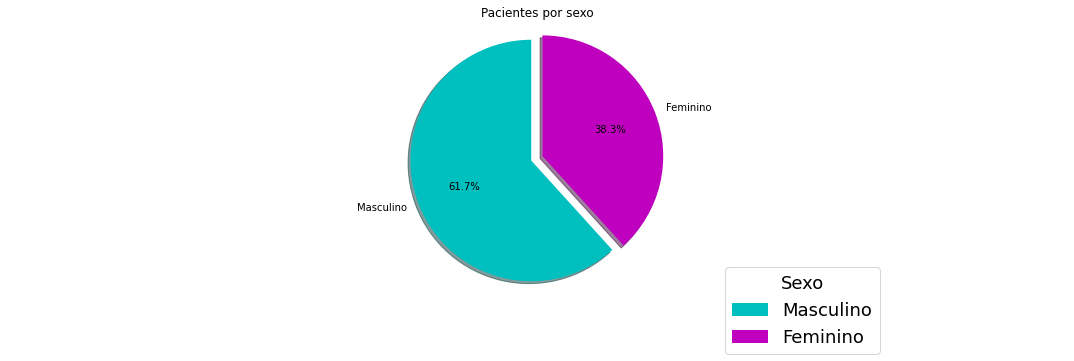

In [32]:
plt.figure(figsize=(19,5))
labels='Masculino', 'Feminino'
explode1=(0,0.1)
plt.pie(sexo, labels=labels, explode=explode1, colors=['c', 'm'], autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Pacientes por sexo')
plt.legend(loc=8, title = 'Sexo', title_fontsize=18, 
                       bbox_to_anchor=(0.5, -0.25, 0.5, 0.5),  fontsize=18)
plt.axis('equal')
plt.show()

In [36]:
dados.columns

Index(['Sexo', 'Entubado', 'Pneumonia', 'Idade', 'Diabético',
       'Obstrução pulmonar crônica', 'Asmático', 'Imunosuprimido',
       'Hipertenso', 'Cardíaco', 'Renal', 'Outras doenças', 'Obeso', 'Fumante',
       'UTI'],
      dtype='object')

In [41]:
feat = ['Entubado', 'Pneumonia', 'Diabético',
       'Obstrução pulmonar crônica', 'Asmático', 'Imunosuprimido',
       'Hipertenso', 'Cardíaco', 'Renal', 'Outras doenças', 'Obeso', 'Fumante',
       'UTI']

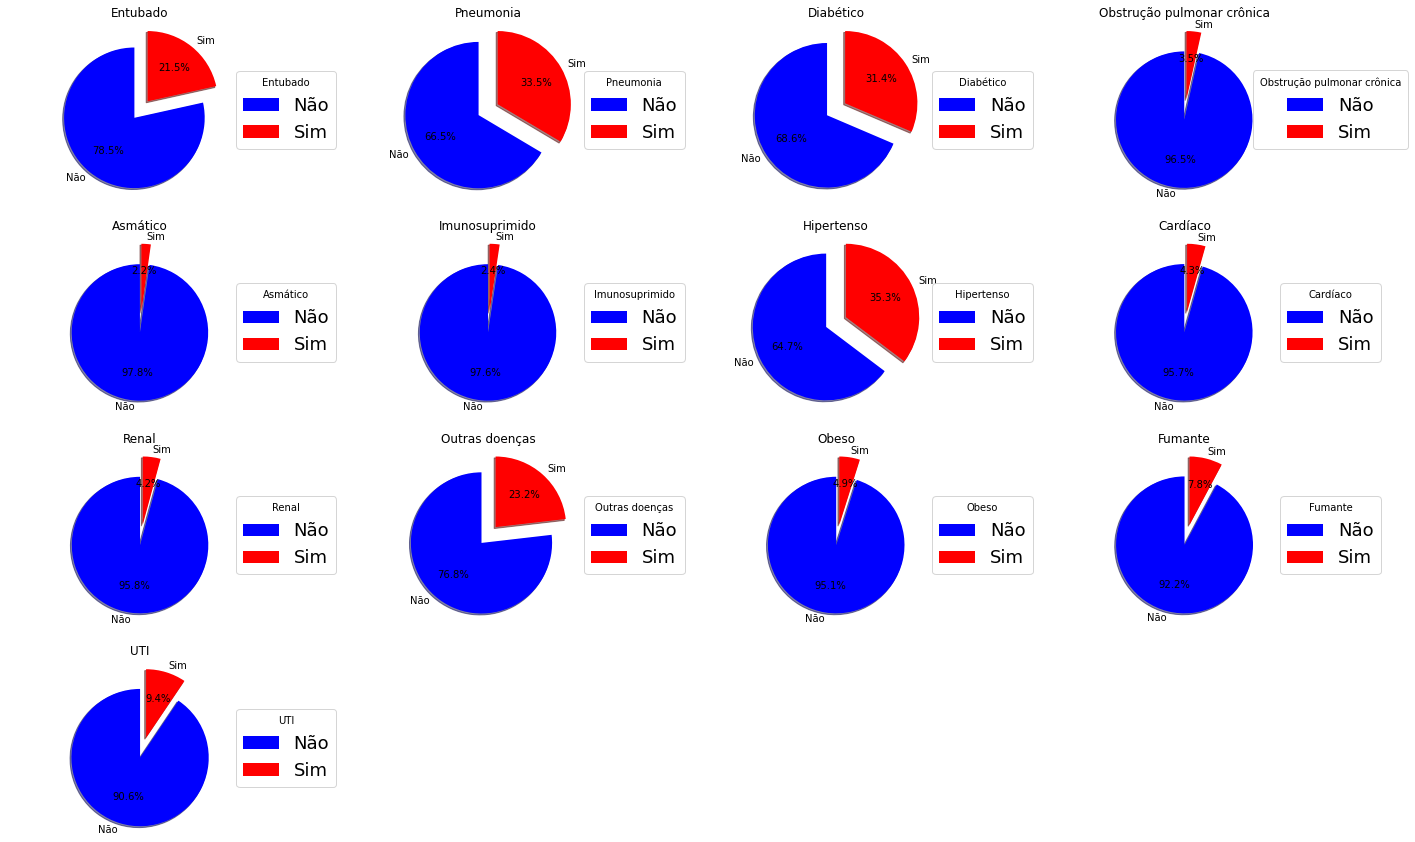

In [82]:
plt.figure(figsize=(20,15))

k = 1
for fts, sub in zip(feat, subs):
    i, j, n = sub
    subb = str(4) + str(4) + str(k)
    subb = int(subb)
    k += 1
    plt.subplot(5, 4, n)
   
    variavel = dados[fts].value_counts()
    labels='Não', 'Sim'
    explode2=(0,0.3)
    plt.pie(variavel, labels=labels, explode=explode2, colors=['b', 'r'], autopct='%1.1f%%', shadow=True,startangle=90)
    plt.title(fts)
    plt.legend(loc=10, title = fts, title_fontsize=10, bbox_to_anchor=(0.7, 0, 0.7, 1),  fontsize=18)
    plt.axis('equal')
plt.tight_layout(pad=2.0)
plt.show()

<div id="arvore-decisao"></div>

## 1. Árvore de Decisão (Decision Tree Classifier)

Trata-se de um algoritmo de aprendizado de máquina para previsões. O processo de elaboração de uma árvore de decisão é similar à organização do pensamento humano. Há nós que se relacionam hierarquicamente, sendo estes centrados em dois tipos:
1. Nó-raiz (root node), um dos atributos da base de dados.
2. Nós-folha (leaf nodes), que são os resultados finais, congruentes com a resposta.

O encaixe de cada variável no seu devido nó é feito por programação. Assim, recorre-se a abordagem de entropia. Esse critério corresponde ao nível de uniformidade dos dados. Quanto menor a entropia, mais homogênea está a base de dados, sendo a recíproca verdadeira.

<div id="implementacao-dt"></div>

### Implementação do modelo

In [ ]:
dados.head(2)

In [ ]:
target = 'Entubado'

# Criando series com a variável target
dados_target = dados_numerico[target]

# Removendo a target
dados_numerico = dados_numerico.drop([target], axis=1)

# Separando treino e teste
dados_treino, dados_teste, target_treino, target_teste = train_test_split(dados_numerico, 
                                                                          dados_target, 
                                                                          test_size=0.2, 
                                                                          random_state=0)

In [ ]:
# Criando árvore de decisão
arvore = DecisionTreeClassifier(criterion='entropy')

# Treinando o modelo
modelo_ad = arvore.fit(dados_treino, target_treino)

# Calculando acurácia do modelo
acuracia_ad = arvore.score(dados_teste, target_teste) * 100
print(f'Precisão do modelo (Decision Tree): {acuracia_ad:.4f} %')

In [ ]:
# Profundidade da árvore gerada
print(f'Profundidade da árvore: {modelo_ad.tree_.max_depth}')

<div id="matriz-dt"></div>

### Verificando resultado com Matriz de Confusão

As matrizes de confusão são úteis para analisar a performance do modelo utilizado. Dividem-se em quatro campos: (1) os verdadeiros positivos e (2) os verdadeiros negativos, que ocorrem quando a previsão acerta; e, por outro lado, há os falsos positivos (3) e os falsos negativos (4) - os últimos sendo previsões incorretas.

In [ ]:
# Figura para plotagem do gráfico
fig, ax = plt.subplots(figsize=(7, 6))

# Matriz de confusão
plot_confusion_matrix(modelo_ad, dados_teste, target_teste, 
                      normalize='true', display_labels=['Não', 'Sim'], 
                      cmap=plt.cm.Blues, ax=ax, values_format='.2%')
plt.xlabel("Valor Previsto", fontsize=14)
plt.ylabel("Valor Verdadeiro")
plt.title("Matriz de confusão\nNormalizada por categoria")
plt.grid(False)

In [ ]:
# Figura para plotagem do gráfico
fig, ax = plt.subplots(figsize=(7, 6))

# Matriz de confusão
plot_confusion_matrix(modelo_ad, dados_teste, target_teste, 
                      normalize='all', display_labels=['Não', 'Sim'], 
                      cmap=plt.cm.Blues, ax=ax, values_format='.2%')
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Verdadeiro")
plt.title("Matriz de confusão\nNormalizada pelo total")
plt.grid(False)

Por meio da matriz de confusão, pode-se inferir que há maior quantidade de respostas positivas na base de dados, o que implica na melhor performance do modelo em casos afirmativos.

<div id="cross-dt"></div>

### Validação Cruzada (*Cross-Validation*)

Essa técnica consiste no treino  e teste do algoritmo pelo próprio dataframe. São feitas n combinações que cruzam, para cada vez, a taxa de acerto dessa combinação. No nosso modelo, usaremos 10 combinações.

In [ ]:
# Calcula resultados
resultados_ad = cross_val_score(modelo_ad, dados_numerico, dados_target, cv=10, scoring='accuracy')

# Calcula média e desvio padrão (em porcentagem)
media_ad = np.mean(resultados_ad) * 100
desv_pad_ad = np.std(resultados_ad, ddof=1) * 100

# Exibe resultados
print('Cross Validation aplicado ao modelo de Árvore de Decisão: \n')
print(f'Média: {media_ad:.4f} %')
print(f'Desvio Padrão: {desv_pad_ad:.4f} %')

In [ ]:
#função que gera dados de treino e teste e arvores com outras profundidades
def arvore(dados, dados_target):
    # Separa dados de treino e teste
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(dados, 
                                                            dados_target, 
                                                            test_size=0.2, 
                                                            random_state=0)
    # Mostra resultados de 2 a 27
    for profundidade in range(2, 28):

        # Árvore de decisão
        arvore_d = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=profundidade)
        # Treina o modelo
        modelo_d = arvore_d.fit(X_treino, Y_treino)
        # Calcula acurácia do modelo
        acuracia = arvore_d.score(X_teste, Y_teste) * 100

        print(f'Profundidade (max_depth) = {profundidade:2.0f} | Acurácia: {acuracia:.2f} %')
    

In [ ]:
# Mostra que limitar as árvores de decisão melhoram a acurácia
arvore(dados_numerico, dados_target)

<div id="regressao"></div>

-------------

## 2. Regressão Logística (Logistic Regression)


Trata-se de um método estatístico que define uma equação para estimar o valor de uma variável com comportamento binário (Sim e não).

<div id="implementacao-lr"></div>

### Implementação do modelo

In [ ]:
# Separação de treino e teste
dados_treino_rl, dados_teste_rl, target_treino_rl, target_teste_rl = train_test_split(dados_numerico, 
                                                                                  dados_target, 
                                                                                  test_size=0.2, 
                                                                                  random_state=0)
# Cria e treina modelo
modelo_rl = LogisticRegression(random_state=0, max_iter=1000).fit(dados_treino_rl, target_treino_rl)
# max_iter define o número de iterações necessárias para o modelo

# Teste do modelo
acuracia_rl = modelo_rl.score(dados_teste_rl, target_teste_rl)*100
print(f'Acurácia do modelo (Regressão Logística): {acuracia_rl:.4f} %')

<div id="matriz-lr"></div>

### Matriz de Confusão

In [ ]:
# Figura para plotagem do gráfico
fig, ax = plt.subplots(figsize=(7, 6))

# Cria e plota matriz de confusão
plot_confusion_matrix(modelo_rl, dados_teste_rl, target_teste_rl, 
                      normalize='true', display_labels=['Não', 'Sim'], 
                      cmap=plt.cm.Reds, ax=ax, values_format='.2%')
plt.xlabel("Valor Previsto", fontsize=14)
plt.ylabel("Valor Verdadeiro")
plt.title("Matriz de confusão\nNormalizada por categoria")
plt.grid(False)

<div id="conclusao"></div>

___
# Conclusão

<div id="referencias"></div>

<h2> Referências </h2>

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/


http://www.saedsayad.com/decision_tree.htm